# K-NN SPEEDUP

The following project carries out the various k-nn speedup strategies on 9 different datasets and compares their accuracies and speed.

### Objectives:

1. The following data structure speedup algorithms are carried out:
  
  a. K-D Tree  
  b. Ball Tree


2. The following case base editing strategies are carried out:
   
  a. The Condensed Nearest Neighbor algorithm  
  b. The Conservative Redundancy Reduction algorithm
  
  
3. The speed and accuracy of the 2 case base editing strategies are compared with respect to the Brute Force k-nearest neighbor method.


4. A Dynamic Time Warping distance metric is implemented to deteermine similarities between cases in datasets containing time-series.


5. The case base editing strategies are implemeted on these time-series datasets, and their relative speeds and accuracies are compared.

Importing all the necessary packages:

In [1]:
import import_ipynb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt  

import dataset_loader as dl #Loading the datasets locally
import sklearn
from sklearn.model_selection import train_test_split

import Evaluation_Core #Notebook for the Core Analysis, with function which takes a dataset and applies the dataset speedup and case base editing strategies, cacluating their respective speeds and accuracies 
from Evaluation_Core import eval_core_large, eval_core #eval_core_large runs each algorithm once on the large dataset, while the eval_core function runs the algorithms a total of 100 times on the relatively smaller datasets

import Evaluation_Advance #Notebook for the Advanced Analysis, with function which takes a dataset and applies the dataset speedup and case base editing strategies, cacluating their respective speeds and accuracies
from Evaluation_Advance import eval_advance

importing Jupyter notebook from Evaluation_Core.ipynb
importing Jupyter notebook from Conservative_RR.ipynb
importing Jupyter notebook from Dynamic_tw.ipynb
importing Jupyter notebook from Evaluation_Advance.ipynb


We now import all the datasets required for the Core Analysis:

In [2]:
news=dl.news #Online News Popularity Dataset
audit=dl.audit #Audit Dataset
wq=dl.wq #Wine Quality Dataset
cc=dl.cc #Default of Credit Card Dataset
diabetes=dl.diabetes #Diabetes Dataset
bn=dl.bn #Banknote authentication dataset
sd=dl.sd #Seeds Dataset

We now create dataframes to store the results for the different datasets. An extra dataframe is created for each dataset, to store Brute Force relative time and accuracies for each algorithm for the display of the  results. 

In [3]:
results1=pd.DataFrame(columns=['Algorithms','Algorithm time','Brute force time','Brute force accuracy','Ball tree time','Ball tree accuracy','KD tree time','KD tree accuracy','Dataset Size'])
results1['Algorithms']=["None","CNN","CRR"]
results2=pd.DataFrame(columns=['Algorithms','Algorithm time','Brute force time','Brute force accuracy','Ball tree time','Ball tree accuracy','KD tree time','KD tree accuracy','Dataset Size'])
results2['Algorithms']=["None","CNN","CRR"]
results3=pd.DataFrame(columns=['Algorithms','Algorithm time','Brute force time','Brute force accuracy','Ball tree time','Ball tree accuracy','KD tree time','KD tree accuracy','Dataset Size'])
results3['Algorithms']=["None","CNN","CRR"]
results4=pd.DataFrame(columns=['Algorithms','Algorithm time','Brute force time','Brute force accuracy','Ball tree time','Ball tree accuracy','KD tree time','KD tree accuracy','Dataset Size'])
results4['Algorithms']=["None","CNN","CRR"]
results5=pd.DataFrame(columns=['Algorithms','Algorithm time','Brute force time','Brute force accuracy','Ball tree time','Ball tree accuracy','KD tree time','KD tree accuracy','Dataset Size'])
results5['Algorithms']=["None","CNN","CRR"]
results6=pd.DataFrame(columns=['Algorithms','Algorithm time','Brute force time','Brute force accuracy','Ball tree time','Ball tree accuracy','KD tree time','KD tree accuracy','Dataset Size'])
results6['Algorithms']=["None","CNN","CRR"]
results7=pd.DataFrame(columns=['Algorithms','Algorithm time','Brute force time','Brute force accuracy','Ball tree time','Ball tree accuracy','KD tree time','KD tree accuracy','Dataset Size'])
results7['Algorithms']=["None","CNN","CRR"]
results_adv1=pd.DataFrame(columns=['Algorithms','Algorithm time','Brute force time','Brute force accuracy','Ball tree time','Ball tree accuracy','KD tree time','KD tree accuracy','Dataset Size'])
results_adv1['Algorithms']=["None","CNN","CRR"]
results_adv2=pd.DataFrame(columns=['Algorithms','Algorithm time','Brute force time','Brute force accuracy','Ball tree time','Ball tree accuracy','KD tree time','KD tree accuracy','Dataset Size'])
results_adv2['Algorithms']=["None","CNN","CRR"]

results1_chart=pd.DataFrame()
results2_chart=pd.DataFrame()
results3_chart=pd.DataFrame()
results4_chart=pd.DataFrame()
results5_chart=pd.DataFrame()
results6_chart=pd.DataFrame()
results7_chart=pd.DataFrame()
results_adv1_chart=pd.DataFrame()
results_adv2_chart=pd.DataFrame()

# Core Analysis

Below, we carry out the Core Analysis on the 7 chosen datasets:

### Dataset 1

This dataset contains the Banknote Authentication data. It has 4 features for each case, and one classification target case.

We now divide the data into the feature set and the target set.

In [4]:
X =bn.iloc[:, :-1].values #feature set
y =bn.iloc[:, 4].values #target set
X.shape,y.shape #checking the size for each set

((1372, 4), (1372,))

We split the data into training and test data with a train test split of 70:30.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) #random state makes sure we get the same train test split in each run

We call the eval_core function from the Evaluation_Core Notebook to carry out the dataset speedup and case base editing strategies on the dataset, and return the results in the form of their accuracies, speeds, and the resultant case base size for the case base editing methods. The predictions are ececuted 100 times in a loop to get a mean of the prediction time.

In [6]:
results1,results1_chart,cnn_size,crr_size=eval_core(X_train,y_train,X_test,y_test) #Passing the Training and the Test data to carry out the methods

### Dataset 2

This dataset contains the Audit data. It has 25 features for each case, and one classification target case.

We now divide the data into the feature set and the target set.

In [7]:
X =audit.iloc[:, :-1].values
y =audit.iloc[:, 25].values
X.shape,y.shape

((775, 25), (775,))

We split the data into training and test data with a train test split of 70:30.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Calling the eval_core function again:

In [9]:
results2,results2_chart,cnn_size,crr_size=eval_core(X_train,y_train,X_test,y_test)

### Dataset 3

This dataset contains the Wine Quality data. It has 11 features for each case, and one classification target case.

We now divide the data into the feature set and the target set.

In [10]:
X =wq.iloc[:, :-1].values
y =wq.iloc[:, 11].values
X.shape,y.shape

((1599, 11), (1599,))

We split the data into training and test data with a train test split of 70:30.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Calling the eval_core function again:

In [12]:
results3,results3_chart,cnn_size,crr_size=eval_core(X_train,y_train,X_test,y_test)

### Dataset 4

This dataset contains the Seeds data. It has 7 features for each case, and one classification target case.

We now divide the data into the feature set and the target set.

In [13]:
X =sd.iloc[:, :-1].values
y =sd.iloc[:, 7].values
X.shape,y.shape

((210, 7), (210,))

We split the data into training and test data with a train test split of 70:30.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Calling the eval_core function again:

In [15]:
results4,results4_chart,cnn_size,crr_size=eval_core(X_train,y_train,X_test,y_test)

### Dataset 5

This dataset contains the Diabetes data. It has 8 features for each case, and one classification target case.

We now divide the data into the feature set and the target set.

In [16]:
X =diabetes.iloc[:, :-1].values
y =diabetes.iloc[:, 8].values
X.shape,y.shape

((768, 8), (768,))

We split the data into training and test data with a train test split of 70:30.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Calling the eval_core function again:

In [18]:
results5,results5_chart,cnn_size,crr_size=eval_core(X_train,y_train,X_test,y_test)

### Dataset 6

This dataset contains the Online News Popularity data. It has 59 features for each case, and one classification target case.

We now divide the data into the feature set and the target set.

In [24]:
X =news.iloc[:, :-1].values
y =news['shares'].values
X.shape,y.shape

((39644, 59), (39644,))

We split the data into training and test data with a train test split of 70:30.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=0)

We call the eval_core_large function from the Evaluation_Core Notebook and pass the training and test data to carry out the dataset speedup and case base editing strategies on the dataset, and return the results in the form of their accuracies, speeds, and the resultant case base size for the case base editing methods. The prediction is executed only once due to the large case-base size.

In [26]:
results6,results6_chart,cnn_size,crr_size=eval_core_large(X_train,y_train,X_test,y_test)

### Dataset 7

This dataset contains the Default of Credit Card data. It has 23 features for each case, and one classification target case.

We now divide the data into the feature set and the target set.

In [32]:
X =cc.iloc[:, :-1].values
y =cc.iloc[:, 23].values
X.shape,y.shape

((30000, 23), (30000,))

We split the data into training and test data with a train test split of 70:30.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=0)

We call the eval_core_large function again:

In [34]:
results7,results7_chart,cnn_size,crr_size=eval_core_large(X_train,y_train,X_test,y_test)

## Core Analysis Results

**We now analyse the results for all the 7 datasets.**

The following dataframe stores the results for the speed comparison of Brute Force, Ball Tree and K-D Tree algorithms:

In [35]:
results_average_2=pd.DataFrame() #These results are the speed comparison of Brute Force, Ball Tree and K-D Tree algorithms
results_average_2['Time wrt BF']=[(((results6['Brute force time'][0]/results6['Brute force time'][0])+(results7['Brute force time'][0]/results7['Brute force time'][0]))/2),(((results6['Ball tree time'][0]/results6['Brute force time'][0])+(results7['Ball tree time'][0]/results7['Brute force time'][0]))/2),(((results6['KD tree time'][0]/results6['Brute force time'][0])+(results7['KD tree time'][0]/results7['Brute force time'][0]))/2)]

The results_average dataframe takes an average of the results over all the 7 datasets:

In [70]:
results_average=pd.DataFrame()
results_average['Algorithms']=["None","CNN","CRR"]
#Calculating average results over all the datasets
results_average['Accuracy wrt BF']=[(results1_chart['Accuracy wrt BF'][0]+results2_chart['Accuracy wrt BF'][0]+results3_chart['Accuracy wrt BF'][0]+results4_chart['Accuracy wrt BF'][0]+results5_chart['Accuracy wrt BF'][0]+results6_chart['Accuracy wrt BF'][0]+results7_chart['Accuracy wrt BF'][0])/7,(results1_chart['Accuracy wrt BF'][1]+results2_chart['Accuracy wrt BF'][1]+results3_chart['Accuracy wrt BF'][1]+results4_chart['Accuracy wrt BF'][1]+results5_chart['Accuracy wrt BF'][1]+results6_chart['Accuracy wrt BF'][1]+results7_chart['Accuracy wrt BF'][1])/7,(results1_chart['Accuracy wrt BF'][2]+results2_chart['Accuracy wrt BF'][2]+results3_chart['Accuracy wrt BF'][2]+results4_chart['Accuracy wrt BF'][2]+results5_chart['Accuracy wrt BF'][2]+results6_chart['Accuracy wrt BF'][2]+results7_chart['Accuracy wrt BF'][2])/7]
results_average['Dataset Size wrt BF']=[(results1_chart['Dataset Size wrt BF'][0]+results2_chart['Dataset Size wrt BF'][0]+results3_chart['Dataset Size wrt BF'][0]+results4_chart['Dataset Size wrt BF'][0]+results5_chart['Dataset Size wrt BF'][0]+results6_chart['Dataset Size wrt BF'][0]+results7_chart['Dataset Size wrt BF'][0])/7,(results1_chart['Dataset Size wrt BF'][1]+results2_chart['Dataset Size wrt BF'][1]+results3_chart['Dataset Size wrt BF'][1]+results4_chart['Dataset Size wrt BF'][1]+results5_chart['Dataset Size wrt BF'][1]+results6_chart['Dataset Size wrt BF'][1]+results7_chart['Dataset Size wrt BF'][1])/7,(results1_chart['Dataset Size wrt BF'][2]+results2_chart['Dataset Size wrt BF'][2]+results3_chart['Dataset Size wrt BF'][2]+results4_chart['Dataset Size wrt BF'][2]+results5_chart['Dataset Size wrt BF'][2]+results6_chart['Dataset Size wrt BF'][2]+results7_chart['Dataset Size wrt BF'][2])/7]
results_average['Time wrt BF']=[(results6_chart['Time wrt BF'][0]+results7_chart['Time wrt BF'][0])/2,(results6_chart['Time wrt BF'][1]+results7_chart['Time wrt BF'][1])/2,(results6_chart['Time wrt BF'][2]+results7_chart['Time wrt BF'][2])/2]


The following dataframe stores the average results of the five smaller datasets:

In [68]:
results_average_f5=pd.DataFrame()
#Calculating average results over the five smaller datasets
results_average_f5['Time wrt BF']=[(results1_chart['Time wrt BF'][0]+results2_chart['Time wrt BF'][0]+results3_chart['Time wrt BF'][0]+results4_chart['Time wrt BF'][0]+results5_chart['Time wrt BF'][0])/5,(results1_chart['Time wrt BF'][1]+results2_chart['Time wrt BF'][1]+results3_chart['Time wrt BF'][1]+results4_chart['Time wrt BF'][1]+results5_chart['Time wrt BF'][1])/5,(results1_chart['Time wrt BF'][2]+results2_chart['Time wrt BF'][2]+results3_chart['Time wrt BF'][2]+results4_chart['Time wrt BF'][2]+results5_chart['Time wrt BF'][2])/5]
results_average_f5['Dataset Size wrt BF']=[(results1_chart['Dataset Size wrt BF'][0]+results2_chart['Dataset Size wrt BF'][0]+results3_chart['Dataset Size wrt BF'][0]+results4_chart['Dataset Size wrt BF'][0]+results5_chart['Dataset Size wrt BF'][0])/5,(results1_chart['Dataset Size wrt BF'][1]+results2_chart['Dataset Size wrt BF'][1]+results3_chart['Dataset Size wrt BF'][1]+results4_chart['Dataset Size wrt BF'][1]+results5_chart['Dataset Size wrt BF'][1])/5,(results1_chart['Dataset Size wrt BF'][2]+results2_chart['Dataset Size wrt BF'][2]+results3_chart['Dataset Size wrt BF'][2]+results4_chart['Dataset Size wrt BF'][2]+results5_chart['Dataset Size wrt BF'][2])/5]


results_average_l2 stores the average results of the two larger datasets:

In [38]:
results_average_l2=pd.DataFrame()
#Calculating average results over the two larger datasets
results_average_l2['Dataset Size wrt BF']=[(results6_chart['Dataset Size wrt BF'][0]+results7_chart['Dataset Size wrt BF'][0])/2,(results6_chart['Dataset Size wrt BF'][1]+results7_chart['Dataset Size wrt BF'][1])/2,(results6_chart['Dataset Size wrt BF'][2]+results7_chart['Dataset Size wrt BF'][2])/2]
results_average_l2['Time wrt BF']=[(results6_chart['Time wrt BF'][0]+results7_chart['Time wrt BF'][0])/2,(results6_chart['Time wrt BF'][1]+results7_chart['Time wrt BF'][1])/2,(results6_chart['Time wrt BF'][2]+results7_chart['Time wrt BF'][2])/2]


Saving the results:

In [71]:
results1.to_csv('results/results1.csv')
results2.to_csv('results/results2.csv')
results3.to_csv('results/results3.csv')
results4.to_csv('results/results4.csv')
results5.to_csv('results/results5.csv')
results6.to_csv('results/results6.csv')
results7.to_csv('results/results7.csv')
results_average.to_csv('results/results_core_average.csv')
results_average_2.to_csv('results/results_bf_bt_kd.csv')
results_average_f5.to_csv('results/results_average_f5.csv')
results_average_l2.to_csv('results/results_average_l2.csv')

Results for the Banknote Dataset:

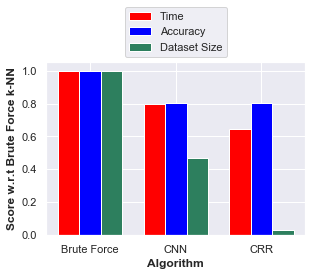

In [43]:
barWidth = 0.25
bars1=(results1_chart["Time wrt BF"].values)
bars2=(results1_chart["Accuracy wrt BF"].values)
bars3=(results1_chart["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset1_result.pdf')  

Results for the Audit dataset:

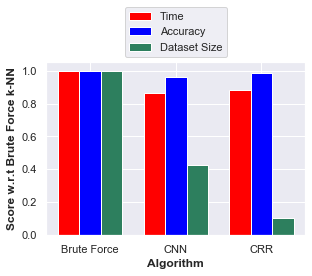

In [44]:
barWidth = 0.25
bars1=(results2_chart["Time wrt BF"].values)
bars2=(results2_chart["Accuracy wrt BF"].values)
bars3=(results2_chart["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset2_result.pdf')  

Results for the Wine Quality dataset:

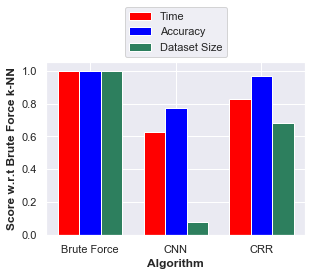

In [45]:
barWidth = 0.25
bars1=(results3_chart["Time wrt BF"].values)
bars2=(results3_chart["Accuracy wrt BF"].values)
bars3=(results3_chart["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset3_result.pdf')  

Results for the Seeds dataset:

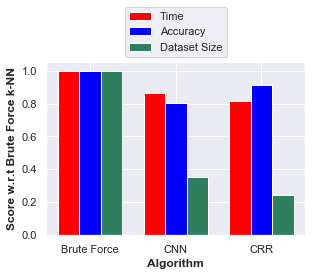

In [46]:
barWidth = 0.25
bars1=(results4_chart["Time wrt BF"].values)
bars2=(results4_chart["Accuracy wrt BF"].values)
bars3=(results4_chart["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset4_result.pdf')  

Results for the Diabetes dataset:

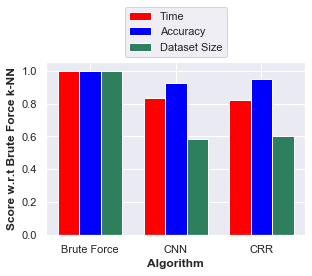

In [47]:
barWidth = 0.25
bars1=(results5_chart["Time wrt BF"].values)
bars2=(results5_chart["Accuracy wrt BF"].values)
bars3=(results5_chart["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size') 
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset5_result.pdf')  

Results for the Online News Popularity dataset:

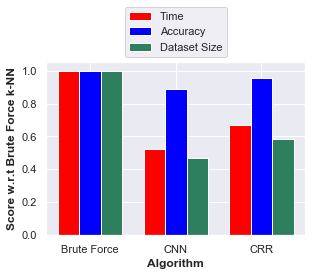

In [48]:
barWidth = 0.25
bars1=(results6_chart["Time wrt BF"].values)
bars2=(results6_chart["Accuracy wrt BF"].values)
bars3=(results6_chart["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset6_result.pdf')  

Results for the Default of Credit Card dataset:

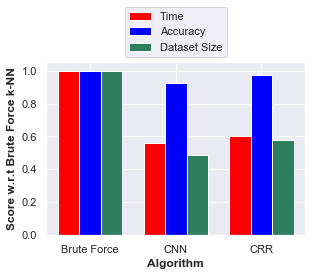

In [49]:
barWidth = 0.25
bars1=(results7_chart["Time wrt BF"].values)
bars2=(results7_chart["Accuracy wrt BF"].values)
bars3=(results7_chart["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size') 
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset7_result.pdf')  

Average results for the five smaller datasets (Banknote, Audit, Wine Quality, Seeds, Diabetes):

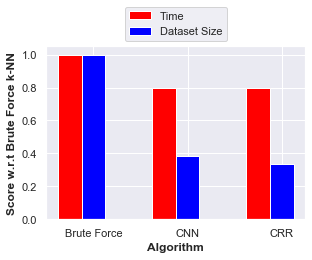

In [50]:
barWidth = 0.25
bars1=(results_average_f5["Time wrt BF"].values)
bars2=(results_average_f5["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Dataset Size')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/results_average_f5.pdf')  

Average results for the two larger datasets (Online News Popularity, Default of Credit Card):

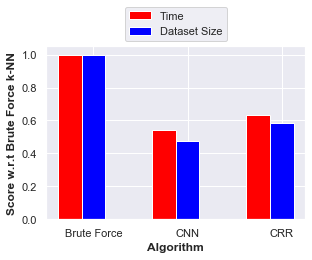

In [51]:
barWidth = 0.25
bars1=(results_average_l2["Time wrt BF"].values)
bars2=(results_average_l2["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Dataset Size')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/results_average_l2.pdf')

Average result over all the seven datasets:

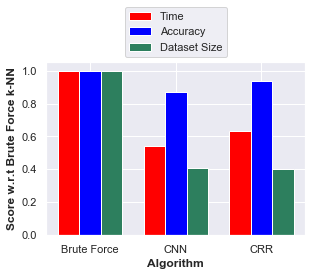

In [52]:
barWidth = 0.25
bars1=(results_average["Time wrt BF"].values)
bars2=(results_average["Accuracy wrt BF"].values)
bars3=(results_average["Dataset Size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size') 
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset_average_result_core.pdf')  

Average results of the speeds of the Brute Force, Ball Tree and K-D Tree algorithms:

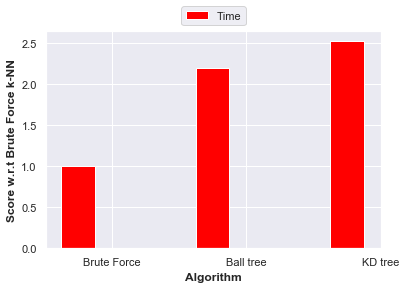

In [53]:
barWidth = 0.25
bars1=(results_average_2["Time wrt BF"].values)
r1 = np.arange(len(bars1))
#Preparing the Plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','Ball tree','KD tree'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset_average_result_bf_bt_kd.pdf')

# Advanced Analysis

### Dataset 1

This dataset contains the Smooth Subspace data. It has 15 features for each case, and one classification target case.

We now divide the data into the feature set and the target set. The dataset is already divided into training and test cases.

In [54]:
ss_train=pd.DataFrame(dl.ss_train[0])
ss_test=pd.DataFrame(dl.ss_test[0])
ss_train['target'] =ss_train['target'].map({b'3': '3', b'2': '2',b'1': '1'}) #Converting the classes into decimal classifications
ss_test['target'] =ss_test['target'].map({b'3': '3', b'2': '2',b'1': '1'}) #Converting the classes into decimal classifications

Gathering the training and test cases:

In [55]:
X_train=ss_train.iloc[:, :-1].values
y_train=ss_train.iloc[:, 15].values
X_test=ss_test.iloc[:, :-1].values
y_test=ss_test.iloc[:, 15].values

We now call the eval_advance function in the Evaluation_Advance notebook and pass the training and test data, which carries out the dataset speedup and case base editing strategies on the dataset, and returns the results in the form of their accuracies, speeds, and the resultant case base size for the case base editing methods. The Similiarities between cases are calculated the implemented Dynamic Time Warping Distane Metric, unlike the Euclidean Distance Metric used in the Core Analysis.

In [56]:
results_adv1,results_adv1_chart,cnn_size,crr_size,p,q,p2,q2=eval_advance(X_train,y_train,X_test,y_test)

### Dataset 2

This dataset contains the Chinatown data. It has 15 features for each case, and one classification target case.

We now divide the data into the feature set and the target set. The dataset is already divided into training and test cases.

In [57]:
ct_train=pd.DataFrame(dl.ct_train[0])
ct_test=pd.DataFrame(dl.ct_test[0])
ct_train=ct_train[~ct_train.isin([np.nan, np.inf, -np.inf]).any(1)] #Removing any null values from the dataset
ct_test=ct_test[~ct_test.isin([np.nan, np.inf, -np.inf]).any(1)]
ct_train['target'] =ct_train['target'].map({b'3': '3', b'2': '2',b'1': '1', b'4': '4', b'5': '5', b'6': '6', b'7': '7', b'8': '8', b'9': '9', b'10': '10'}) #Converting the classes into decimal classifications
ct_test['target'] =ct_test['target'].map({b'3': '3', b'2': '2',b'1': '1', b'4': '4', b'5': '5', b'6': '6', b'7': '7', b'8': '8', b'9': '9', b'10': '10'}) #Converting the classes into decimal classifications

Gathering the training and test cases:

In [58]:
X_train=ct_train.iloc[:, :-1].values
y_train=ct_train.iloc[:, 24].values
X_test=ct_test.iloc[:, :-1].values
y_test=ct_test.iloc[:, 24].values

We now call the eval_advance function again:

In [59]:
results_adv2,results_adv2_chart,cnn_size,crr_size,p,q,p2,q2=eval_advance(X_train,y_train,X_test,y_test)

# Advanced Analysis Results

Calculating the average results over the two datasets:

In [72]:
results_adv_average=pd.DataFrame()
results_adv_average['Algorithms']=["None","CNN","CRR"]
#Calculating average results over both the datasets
results_adv_average['Time wrt BF']=[(results_adv1_chart['Time wrt BF'][0]+results_adv2_chart['Time wrt BF'][0])/2,(results_adv1_chart['Time wrt BF'][1]+results_adv2_chart['Time wrt BF'][1])/2,(results_adv1_chart['Time wrt BF'][2]+results_adv2_chart['Time wrt BF'][2])/2]
results_adv_average['Accuracy wrt BF']=[(results_adv1_chart['Accuracy wrt BF'][0]+results_adv2_chart['Accuracy wrt BF'][0])/2,(results_adv1_chart['Accuracy wrt BF'][1]+results_adv2_chart['Accuracy wrt BF'][1])/2,(results_adv1_chart['Accuracy wrt BF'][2]+results_adv2_chart['Accuracy wrt BF'][2])/2]
results_adv_average['Dataset size wrt BF']=[(results_adv1_chart['Dataset size wrt BF'][0]+results_adv2_chart['Dataset size wrt BF'][0])/2,(results_adv1_chart['Dataset size wrt BF'][1]+results_adv2_chart['Dataset size wrt BF'][1])/2,(results_adv1_chart['Dataset size wrt BF'][2]+results_adv2_chart['Dataset size wrt BF'][2])/2]

We save the results as CSV files:

In [73]:
results_adv1.to_csv('results/results_adv1.csv')
results_adv2.to_csv('results/results_adv2.csv')
results_adv_average.to_csv('results/results_adv_average.csv')

Visualising the results for the Smooth Subspace Dataset: 

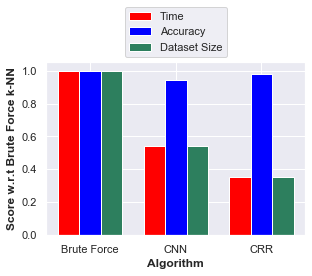

In [62]:
barWidth = 0.25
bars1=(results_adv1_chart["Time wrt BF"].values)
bars2=(results_adv1_chart["Accuracy wrt BF"].values)
bars3=(results_adv1_chart["Dataset size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset_adv_1_result.pdf')

Visualising the results for the Chinatown Dataset:

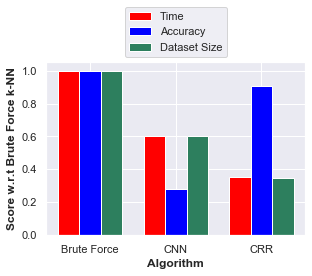

In [63]:
barWidth = 0.25
bars1=(results_adv2_chart["Time wrt BF"].values)
bars2=(results_adv2_chart["Accuracy wrt BF"].values)
bars3=(results_adv2_chart["Dataset size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset_adv_2_result.pdf')

Displaying the average results over the two datasets:

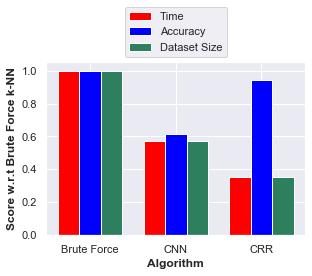

In [64]:
barWidth = 0.25
bars1=(results_adv_average["Time wrt BF"].values)
bars2=(results_adv_average["Accuracy wrt BF"].values)
bars3=(results_adv_average["Dataset size wrt BF"].values)
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#Preparing the Plot
fig = plt.figure()
ax = fig.add_axes([0.2, 0.15, 0.6, 0.6])
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dataset Size') 
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset_adv_average_result.pdf')  

Displaying the average speed of the models trained on the edited case-bases produced by the different case-base editing algorithms:

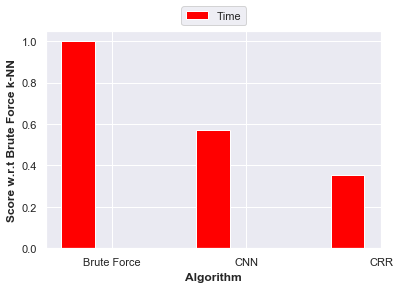

In [65]:
barWidth = 0.25
bars1=(results_adv_average["Time wrt BF"].values)
r1 = np.arange(len(bars1))
#Preparing the Plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Time')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset_adv_average_result_time.pdf')

Displaying the average accuracy of the models trained on the edited case-bases produced by the different case-base editing algorithms:

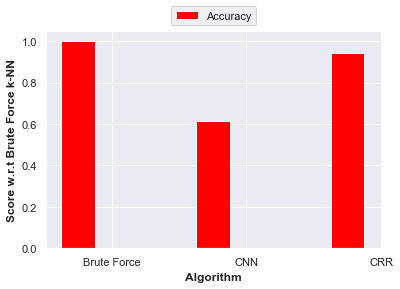

In [66]:
barWidth=0.25
bars1=(results_adv_average["Accuracy wrt BF"].values)
r1=np.arange(len(bars1))
#Preparing the Plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Accuracy')
#Adding the labels
plt.xlabel('Algorithm', fontweight='bold') 
plt.ylabel('Score w.r.t Brute Force k-NN', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Brute Force','CNN','CRR'])
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, 1)) #Placing the legend
plt.savefig('results/dataset_adv_average_result_time.pdf')

# Conclusion:

1. The CRR proved to be less aggressive than the CNN strategy and preserved the borderline cases which improved the prediction accuracy with a more balanced edited case-base as compared to CNN, while still being able to reduce the case-base size considerably and keeping the prediction time short. It even reduced the case-base size more than the CNN method in some datasets as seen in the results and still maintained a higher prediction accuracy than CNN.


2. Dynamic Time Warping provided a non-linear alignment between two time-series, which resulted in a more accurate similarity measure between the two time-series. Given its advantages, it is computationally heavier than the Euclidean Distance Metric.


3. The CRR algorithm performed more efficiently than the CNN algorithm in speed and accuracy for time-series. It produced a smaller case base than that of CNN, while still maintained to retain a balanced representation for each class label and the borderline and rare cases, which improved the prediction accuracy over CNN.